<a href="https://colab.research.google.com/github/akimotolab/CMAES_Tutorial/blob/main/2_step_size_adaptation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step-Size Adaptation

前回までに，Sphere関数において，以下を実験的に確認した．
1. 平均ベクトルと最適解の距離と比較して，ステップサイズと次元数の積が非常に小さい場合，指数スケールで見た場合に目的関数の減少率が低い．（指数スケールでなく，目的関数の値の減少量に着目した場合は，3.の場合と同程度かそれ以上に大きいことに注意．ここではあくまで減少率に着目している）
2. 平均ベクトルと最適解の距離と比較して，ステップサイズと次元数の積が非常に大きい場合，探索が停滞する
3. 平均ベクトルと最適解の距離と比較して，ステップサイズと次元数の積が同程度の場合，指数スケールで見た場合に目的関数の減少率が高い

上述のような振る舞いをする理由は以下の通りである．

1. $\|m - x^*\| \gg \sigma$ の場合：平均ベクトルの更新は，生成された解のうち上位$\mu$個の平均値を取ることで行われる．生成される解は$m$を中心に，$\sigma \mathcal{N}(0, I)$を加えることで生成されるわけだが，$\|\mathcal{N}(0, 1)\|$は自由度$N$（$N$は次元数）の$\chi$分布に従うため，その期待値は$\sqrt{N}$程度である．したがって，一度の$m$の更新での変化量（距離）は高々$\sigma \sqrt{N}$程度である．このとき，更新前の平均ベクトル$m$と更新後の平均ベクトル$m'$とで，最適解からの距離を考えると，
$$
\frac{\| m' - x^* \|}{\| m - x^* \|} \gtrapprox \frac{\| m - x^* \| - \alpha \sigma \sqrt{N}}{\| m - x^* \|} = 1 - \frac{\alpha \sigma \sqrt{N}}{\| m - x^* \|}
$$
となることが予想される．ここで，$\alpha > 0$は何らかの比例定数である．$\|m - x^*\| \gg \sigma$である場合には，第２項が$0$に近いため，平均ベクトルと最適解の距離が，比率の意味ではほとんど減少していかないように見えるのである．ただ，変化量自体は$\sigma \sqrt{N}$に比例しているため，最適解にコンスタントに近づいてはいる．

2. $\|m - x^*\| \ll \sigma$ の場合：簡単のため，$m = x^*$である場合を考える．このとき，解候補は$x_i \sim \sigma \mathcal{N}(0, I)$に従って生成される．この中から上位$\mu$個を選択してその平均を計算しているが，理解のため，ランダムに選択された$\mu$個の解の平均を計算すると，これは正規分布の性質から
$$
\sum_{i=1}^{\mu} w_i x_i \sim \mathcal{N}\left( 0, \left(\sum_{i=1}^{\mu} w_i^2\right)\sigma^2 I \right) \sim \frac{\sigma }{\sqrt{\mu}}\mathcal{N}\left( 0, I \right)
$$
となる．これが更新後の平均ベクトル$m'$が従う確率分布となる．すなわち，$m = x^*$であったとしても，更新後には$\sigma \sqrt{N} / \sqrt{\mu}$ に比例した距離だけ最適解から離れることが予想される．この議論では簡単のため上位解がランダムに選択されていることを想定したが，本来は最適解により近い解が選択されているため，ここで計算した分布よりも最適解に近い分布に従うことが予想される．ただし，解を正規分布から生成しており，正規分布のノルムの値が期待値付近に集中しているという事実を考えれば，ここで考えた分布とそう変わらないことが予想される．したがって，$\sigma$の大きさによって定まる距離以上に最適解に収束していくことはできないことが分かる．

3. $\| m - x^*\| \propto N \sigma$ の場合：1. での議論から，$\sigma \propto \| m - x^*\|$のとき，指数的に平均ベクトルが最適解に近づいていくことがわかる．なぜ$\| m - x^*\| \propto N \sigma$が適切なのか（なぜ$N$に比例するのか）は簡単に説明することは難しい．ただ，凸二次関数の場合，一回の平均ベクトル更新で目的関数の期待値を最も減少させるためには，$\sigma \propto \|\nabla f\| / Tr(\nabla \nabla f)$ であることが解析的に求められており[1,2]，Sphere関数の場合には，
$$
\sigma \propto \frac{\|\nabla f\|}{Tr(\nabla \nabla f)} = \frac{\| m - x^*\|}{N}
$$
である．

#### 参考文献
1. D. Arnold. Optimal Weighted Recombination. FOGA (2005)

2. Y. Akimoto, A. Auger, N. Hansen. Quality gain analysis of the weighted recombination evolution strategy on general convex quadratic functions. TCS (2020)

## 凸二次関数のもとでの最適ステップサイズ

上述のように，文献[1]ではSphericalな関数$h(x) = \frac{1}{2}(x-x^*)^\mathrm{T} (x-x^*)$，文献[2]では一般の凸二次関数$h(x) = \frac{1}{2}(x-x^*)^\mathrm{T} A (x-x^*)$の単調変換$g: \mathbb{R} \to \mathbb{R}$によって目的関数$f(x) = g(h(x))$が与えられる場合の，最適なステップサイズを導出している．

これらの文献では，指標としてパラメータ更新後の平均ベクトル$m'$における目的関数値の期待値のパラメータ更新前の平均ベクトル$m$での目的関数値からの減少率（を正規化したもの）
$$
 \frac{N(f(m) - \mathbb{E}[f(m') \mid m, \sigma]}{f(m)}
$$
を採用し，これが最大になるような$\sigma$ を次元数の極限$N\to\infty$のもとで導出している．これが，上述の最適ステップサイズである．

Sphericalな関数の場合，最適ステップサイズは現在の平均ベクトルと最適解の距離を次元数＄N＄で割った値に比例する．この最適ステップサイズは$N\to\infty$の極限において導出されているが，有限の$N$の場合にも最適な値を良く近似している．

#### 補足：ステップサイズが$N$に反比例することに対する良くある誤解

良くある誤解として，最適ステップサイズは
$$
\frac{\|m - x^*\|}{\sqrt{N}}
$$
に比例するのではないか，というものがある．すなわち，$N$に反比例するのではなく，＄\sqrt{N}＄に反比例するのではないか，というものである．この$\sqrt{N}$の理屈は以下のようである．まず，現在の平均ベクトルから最適解までの距離が$\|m - x^*\|$なのだから，平均ベクトルから生成される解候補までの距離もこれと同程度であるべきであると考えられるかもしれない．解候補は$x \sim m + \sigma \mathcal{N}(0, I)$と生成され，$\|x - m\| = \sigma \|\mathcal{N}(0, I)\|$が得られる．$\|\mathcal{N}(0, I)\|$は自由度$N$のχ分布に従うため，その値は$\sqrt{N}$あたりに集中している．すなわち，$\|x - m\| \approx \sigma \sqrt{N}$となる．これが，$\|m - x^*\|$と一致するには，$\sigma = \frac{\|m - x^*\|}{\sqrt{N}}$とすればよい．概ねこういった理屈であろう．この議論自体は受け入れやすいかもしれないが，この議論ではパラメータ更新まで考慮できていないことが問題である．

なぜ$\sqrt{N}$ではなく$N$に反比例するのかの理解の助けとなるよう，厳密性を欠いた話をする．きちんと理解したい人は，文献[2]を精読いただきたい．まず，重要な点は，目的関数値の分布である．
（2023/03/28　執筆中）

## 最適ステップサイズを用いた場合の振る舞い

最適ステップサイズは特定の目的関数で，かつ勾配を知っている場合にしか計算できないため，一般的にはこれを用いたアルゴリズムは実用的ではないが，これが分かる場合（理想的な場合）の振る舞いを見ておこう．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class OptimalES(object):
    """ステップサイズを最適解からの距離に比例させた Evolution Strategy"""
    
    def __init__(self, func, init_mean, sigma_coeff, nsample):
        """コンストラクタ
        
        Parameters
        ----------
        func : callable
            目的関数 (最小化)
        init_mean : ndarray (1D)
            初期平均ベクトル
        sigma_coeff : float
            ステップサイズの比例定数
        nsample : int
            サンプル数
        """
        self.func = func
        self.mean = init_mean.copy()
        self.sigma_coeff = sigma_coeff
        self.N = self.mean.shape[0]                     # 探索空間の次元数
        self.arx = np.zeros((nsample, self.N)) * np.nan # 候補解
        self.arf = np.zeros(nsample) * np.nan           # 候補解の評価値
        self.sigma = self.sigma_coeff * np.linalg.norm(self.mean) / self.N
        
        self.weights = np.zeros(nsample)
        self.weights[:nsample//4] = 1.0 / (nsample//4)  # 重み．総和が1
    
    def sample(self):
        """候補解を生成する．"""
        self.arx = self.mean + self.sigma * np.random.normal(size=self.arx.shape)
    
    def evaluate(self):
        """候補解を評価する．"""
        for i in range(self.arf.shape[0]):
            self.arf[i] = self.func(self.arx[i])
        
    def update_mean(self):
        """平均ベクトルを更新する．"""
        idx = np.argsort(self.arf)  # idx[i]は評価値がi番目に良い解のインデックス
        self.mean += np.dot(self.weights, (self.arx[idx] - self.mean))
        
    def update_sigma(self):
        """ステップサイズを更新する．"""
        self.sigma = self.sigma_coeff * np.linalg.norm(self.mean) / self.N

In [ ]:
def sphere(x):
    """Sphere関数．最適解は(0,...,0)"""
    return np.dot(x, x) / 2

In [ ]:
es = OptimalES(func=sphere,            
        init_mean=np.ones(10),  
        sigma_coeff=0.01, 
        nsample=10)             

maxiter = 5000
fbest = np.zeros(maxiter) * np.nan
fmean = np.zeros(maxiter) * np.nan
sigmaN = np.zeros(maxiter) * np.nan
for i in range(fbest.shape[0]):
    es.sample()
    es.evaluate()
    es.update_mean()
    es.update_sigma()
    fbest[i] = es.arf.min()
    fmean[i] = sphere(es.mean)
    sigmaN[i] = es.sigma * es.N

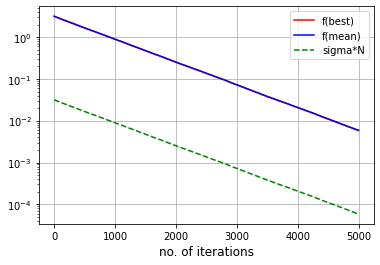

In [ ]:
plt.semilogy(fbest, '-r', label='f(best)')
plt.semilogy(fmean, '-b', label='f(mean)')
plt.semilogy(sigmaN, '--g', label='sigma*N')
plt.xlabel('no. of iterations', fontsize='large')
plt.grid()
plt.legend()

収束の速さ(傾き)を比較する．
$$CR := -\frac{N}{t}\log_{10}\frac{\|X^{(t)}\|}{\|X^{(0)}\|}$$
$CR > 0$ ならば収束(高いほど速い)，$CR < 0$ならば発散

In [ ]:
for N in [10, 100, 1000]:
    sigma_co = 2 ** np.arange(-6., 3., 0.2)
    init_mean = np.ones(N)
    maxiter = 1000
    nsample = 10
    cr = np.zeros(sigma_co.shape[0])
    nseed = 20

    for j in range(sigma_co.shape[0]):
        sc = sigma_co[j]
        for seed in np.arange(nseed):
            np.random.seed(seed * 100)  # 確率的アルゴリズムなので，複数回同じ設定で試行し，平均をとる．
        
            es = OptimalES(func=sphere,            
                          init_mean=init_mean,  
                          sigma_coeff=sc, 
                          nsample=nsample)             

            for i in range(maxiter):
                es.sample()
                es.evaluate()
                es.update_mean()
                es.update_sigma()

            cr[j] += - (np.log10(np.linalg.norm(es.mean)) - np.log10(np.linalg.norm(init_mean))) / maxiter
        cr[j] *= es.N / nseed
        print(sc, cr[j])
        
    # Dataを保存しておく
    np.savetxt('CR_Sphere_N' + str(init_mean.shape[0]) + '_L' + str(nsample) + '.csv', np.vstack((sigma_co, cr)).T)

0.015625 0.008623888250343588
0.017948411796828673 0.009904174164505668
0.02061731110582648 0.01137440906915887
0.02368307135172498 0.013061705336620573
0.027204705103003893 0.015000568596176392
0.03125000000000002 0.017225299223861415
0.03589682359365737 0.01977951597134792
0.04123462221165298 0.022708791288994872
0.047366142703449986 0.02607469642511627
0.05440941020600782 0.029946423133662744
0.06250000000000008 0.03437774626028334
0.07179364718731479 0.039440645235898124
0.08246924442330601 0.04525357709350251
0.09473228540690003 0.05186552449697139
0.10881882041201571 0.05949194973995227
0.12500000000000022 0.06823444436690448
0.14358729437462966 0.07827449671601326
0.16493848884661214 0.08953542088475387
0.1894645708138002 0.1027080620937447
0.21763764082403153 0.11750477860433614
0.2500000000000006 0.13447385065185724
0.2871745887492595 0.1537982251131665
0.32987697769322444 0.17532209817363706
0.3789291416276006 0.20017153558975356
0.43527528164806334 0.22827399611509175
0.5000

OSError: ignored

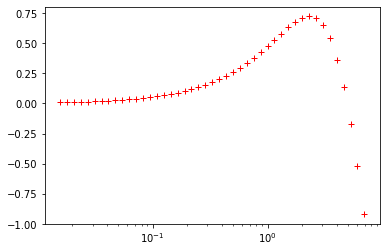

In [ ]:
data = np.loadtxt('CR_Sphere_N10_L10.csv')
plt.semilogx(data[:, 0], data[:, 1], '+r', label='N=10')
data = np.loadtxt('CR_Sphere_N100_L10.csv')
plt.semilogx(data[:, 0], data[:, 1], '*b', label='N=100')
data = np.loadtxt('CR_Sphere_N1000_L10.csv')
plt.semilogx(data[:, 0], data[:, 1], 'xg', label='N=1000')
plt.grid()
plt.legend(loc='best')
plt.ylabel('Convergence Rate')
plt.xlabel('Sigma Coefficient')

## ステップサイズの適応

一般に，
* 目的関数は凸二次関数ではない．
* （ブラックボックス最適化の設定では）勾配は計算できないから，ステップサイズを更新するために勾配を使うことはできない．

### Cumulative Step-size Adaptation (CSA)

#### アイディア:
* 平均ベクトルが同じ方向に移動している => ステップサイズを大きくする
* 平均ベクトルがランダムに移動 => ステップサイズを変化させない
* 平均ベクトルが行ったり来たり => ステップサイズを小さくする

直感的には理解しやすいであろう．同じ方向に移動し続けているような状況は，ステップサイズが小さすぎると考えられ，逆に行ったり来たりしている状況はステップサイズが大きすぎると考えられる．ただ，どこを境に大きすぎる，小さすぎる，と判断するかは，なかなか直感的に決めることが難しいであろう．CSAのアルゴリズム設計上で最も重要な部分は，「平均ベクトルの移動がランダムであるとき」をステップサイズを増加させるか減少させるかの基準として設けている点である．

#### 具体的な更新方法
ここまでの話では，簡単のため共分散行列は$\Sigma = \sigma^2 I$であるような場合しか検討していないが，この先の一般化を考慮して，以下のアルゴリズムでは解候補を生成する正規分布は$\mathcal{N}(m, \Sigma)$に従っていることを想定する．このような一般の正規分布は，$x_{i} \sim m + \sqrt{\Sigma} \mathcal{N}(0, I)$ と生成される．ここで，$\sqrt{\Sigma}$は$\Sigma = \sqrt{\Sigma} \sqrt{\Sigma}$ を満たす非負定値対象行列である．

ステップサイズの更新は以下のように行われる：
$$
\begin{aligned}
p_\sigma &\leftarrow (1 - c_\sigma) p_\sigma + \sqrt{\frac{c_\sigma (2 - c_\sigma)}{\sum_{j=1}^{\lambda} w_j^2} } \sum_{i=1}^{\lambda} w_i \sqrt{\Sigma}^{-1} (x_{i:\lambda} - m) 
\\
\sigma &\leftarrow \sigma \exp\left( \frac{c_\sigma}{d_\sigma} \left( \frac{\|p_\sigma\|}{\mathbb{E}[\|\mathcal{N}(0, I)\|]} - 1\right)\right)
\end{aligned}
$$
なお，$x_{i:\lambda}$は$\lambda$個の解の中で$i$番目に目的関数値の良い解，$m$は更新前の（$x_i$生成時の）平均ベクトルを表す．
$c_\sigma$はcumulation factorと呼ばれ，
$1/c_\sigma$に比例したイテレーション分の平均ベクトル移動量を累積していると考えられる．また，
$d_\sigma$は減衰率（damping factor）と呼ばれ，急激な$\sigma$の変化を防ぐために導入されている．

#### 設計原理
$p_\sigma$ は進化パス（evolution path）と呼ばれ，平均ベクトルの移動量を累積していることが分かる．ステップサイズ$\sigma$は進化パスの長さをもとに更新されるが，この長さが次元数$N$の標準正規分布のノルムの期待値$\mathbb{E}[\|\mathcal{N}(0, I)\|]$と比べて大きければステップサイズを大きく，小さければステップサイズを小さくしている．この点については理解しやすいであろう．

ここでは，「平均ベクトルがランダムに移動している場合にはステップサイズを変化させない」という設計指針が，どのようにして実現されているのかを，進化パスの各要素を見ていきながら確認する．

以下の議論では，目的関数の値が$x$によらずにランダムに与えられるような状況を想定する．このとき，解候補のランキングはランダムであるから，$x_{i:\lambda}$は独立に正規分布$x_{i} \sim \mathcal{N}(m, \Sigma)$に従う．このとき，平均ベクトルはランダムに移動することになり，上述のステップサイズを変化させない状況に対応することが分かる．

まず，$\sqrt{\Sigma}^{-1} (x_{i:\lambda} - m)$について考える．正規分布の性質より，$\sqrt{\Sigma}^{-1} (x_{i:\lambda} - m) \sim \mathcal{N}(0, I)$となる．これは，$x_{i:\lambda}$を平均ベクトルが0，共分散行列が$I$となるように標準化していることにほかならない．

次に，$\sqrt{\frac{1}{\sum_{j=1}^{\lambda} w_j^2} }\sum_{i=1}^{\lambda} w_i \sqrt{\Sigma}^{-1} (x_{i:\lambda} - m)$について考える．$\sqrt{\Sigma}^{-1} (x_{i:\lambda} - m) \sim \mathcal{N}(0, I)$が独立であることから，正規分布の性質より，
$$\sqrt{\frac{1}{\sum_{j=1}^{\lambda} w_j^2} }\sum_{i=1}^{\lambda} w_i \sqrt{\Sigma}^{-1} (x_{i:\lambda} - m) \sim \sqrt{\frac{1}{\sum_{j=1}^{\lambda} w_j^2} }\mathcal{N}\left( 0, \sum_{i=1}^{\lambda} w_i^2 I \right)
\sim \mathcal{N}\left( 0, I \right)
$$
となる．平均が$0$の独立な確率変数の平均をとると，その分分散が小さくなるため，これを$\sqrt{\frac{1}{\sum_{j=1}^{\lambda} w_j^2} }$により補正している，と考えられる．なお，仮に目的関数値の優れる領域が平均ベクトルからみて一方向に偏っている場合，選択された標準化解$\sqrt{\Sigma}^{-1} (x_{i:\lambda} - m)$ は正規分布に従わず，平均ベクトルも$0$とはならない．そのような場合，この補正により現在検討している項の大きさが大きくなる点もポイントである．

最後に，$(1 - c_\sigma)$と$\sqrt{c_\sigma (2 - c_\sigma)}$について考える．初期の$p_\sigma$を$p_\sigma^{(0)}$，$t$回更新後の進化パスを$p_\sigma^{(t)}$と書けば，ランダムな目的関数のもとでの更新後の進化パスは
$$\begin{aligned}
p_\sigma^{(t)} 
&\sim (1 - c_\sigma) p_\sigma^{(t-1)} + \sqrt{c_\sigma (2 - c_\sigma)} \mathcal{N}(0, I)
\\
&\sim (1 - c_\sigma) p_\sigma^{(t-1)} +  \mathcal{N}(0, (c_\sigma (2 - c_\sigma))I)
\\
&\sim (1 - c_\sigma)^t p_\sigma^{(0)} +  \mathcal{N}\left(0, (c_\sigma (2 - c_\sigma))\left(\sum_{i=0}^{t-1} (1 - c_\sigma)^{2i} \right) I \right)
\\
&\sim (1 - c_\sigma)^t p_\sigma^{(0)} +  \mathcal{N}\left(0, (1 - (1 - c_\sigma)^{2t}) I \right)
\end{aligned}$$
に従う．すなわち，進化パスはおおよそ（$t$について漸近的に）$\mathcal{N}(0, I)$に従うことが分かる．

以上より，ランダムな目的関数のもとでは，進化パスはおおよそ$\mathcal{N}(0, I)$に従うことになる．このとき，CSAでの対数ステップサイズの更新の期待値は
$$\begin{aligned}
\log(\sigma) 
&\leftarrow \log(\sigma) + \mathbb{E}\left[\frac{c_\sigma}{d_\sigma} \left( \frac{\|p_\sigma\|}{\mathbb{E}[\|\mathcal{N}(0, I)\|]} - 1\right) \right]
\\
&\leftarrow \log(\sigma) + \frac{c_\sigma}{d_\sigma} \left( \frac{\mathbb{E}\left[\|p_\sigma\| \right]}{\mathbb{E}[\|\mathcal{N}(0, I)\|]} - 1\right) 
\\
&\leftarrow \log(\sigma) 
\end{aligned}
$$
となるため，対数ステップサイズは不偏となる．このことから，CSAの更新式は設計アイディアを反映したものであることが分かる．

参考：ランダムな目的関数の場合，そこから得られる情報はない．その場合，パラメータは変更されるべきでない，という考えは自然であり，上のようなパラメータ更新の不偏性を考えるということは，アルゴリズム設計上で非常に大切なことである．

#### 実装

In [ ]:
class CSAES(object):
    """CSA Evolution Strategy"""
    
    def __init__(self, func, init_mean, init_sigma, nsample):
        """コンストラクタ
        
        Parameters
        ----------
        func : callable
            目的関数 (最小化)
        init_mean : ndarray (1D)
            初期平均ベクトル
        init_sigma : float
            初期ステップサイズ
        nsample : int
            サンプル数
        """
        self.func = func
        self.mean = init_mean
        self.sigma = init_sigma
        self.N = self.mean.shape[0]                     # 探索空間の次元数
        self.arx = np.zeros((nsample, self.N)) * np.nan # 候補解
        self.arf = np.zeros(nsample) * np.nan           # 候補解の評価値
        
        self.weights = np.zeros(nsample)
        self.weights[:nsample//4] = 1.0 / (nsample//4)  # 重み．総和が1
        
        # For CSA
        self.ps = np.zeros(self.N)
        self.cs = 4.0 / (self.N + 4.0)
        self.ds = 1.0 + self.cs
        self.chiN = np.sqrt(self.N) * (1.0 - 1.0 / (4.0 * self.N) + 1.0 / (21.0 * self.N * self.N))
        self.mueff = 1.0 / np.sum(self.weights**2)
        
    def sample(self):
        """候補解を生成する．"""
        self.arx = self.mean + self.sigma * np.random.normal(size=self.arx.shape)
    
    def evaluate(self):
        """候補解を評価する．"""
        for i in range(self.arf.shape[0]):
            self.arf[i] = self.func(self.arx[i])
        
    def update_mean(self):
        """平均ベクトルを更新する．"""
        idx = np.argsort(self.arf)  # idx[i]は評価値がi番目に良い解のインデックス
        self.mean += np.dot(self.weights, (self.arx[idx] - self.mean))
        
    def update_sigma(self):
        """CSA"""
        idx = np.argsort(self.arf)  # idx[i]は評価値がi番目に良い解のインデックス
        # 進化パスの更新 (平均ベクトル移動量の蓄積)
        self.ps = (1 - self.cs) * self.ps + np.sqrt(self.cs * (2 - self.cs) * self.mueff) * np.dot(self.weights, (self.arx[idx] - self.mean)) / self.sigma
        # 進化パスの長さが，ランダム関数の下での期待値よりも大きければステップサイズを大きくする．
        self.sigma = self.sigma * np.exp(self.cs / self.ds * (np.linalg.norm(self.ps) / self.chiN - 1))

In [ ]:
es = CSAES(func=sphere,            
           init_mean=np.ones(10),  
           init_sigma=1., 
           nsample=10)             

maxiter = 200
mean = np.zeros(maxiter) * np.nan
sigmaN = np.zeros(maxiter) * np.nan
for i in range(maxiter):
    es.sample()
    es.evaluate()
    es.update_sigma()
    es.update_mean()
    mean[i] = sphere(es.mean)
    sigmaN[i] = es.sigma * es.N

In [ ]:
plt.semilogy(mean, '-b', label='f(mean)')
plt.semilogy(sigmaN, '--g', label='sigma*N')
plt.xlabel('no. of iterations', fontsize='large')
plt.grid()
plt.legend()

#### 最適ステップサイズとの比較

In [ ]:
# CSA
plt.semilogy(sigmaN / mean, '-b', label='CSA')
# Optimal
data = np.loadtxt('CR_Sphere_N10_L10.csv')
idx = np.argmax(data[:, 1])
plt.semilogy(np.ones(mean.shape) * data[idx, 0], '-r', label='Opt')

plt.title('sigma * N / ||M|| 10D-Sphere')
plt.xlabel('no. of iterations', fontsize='large')
plt.grid()
plt.legend(loc='best')

#### 確認事項
* 初期ステップサイズが小さすぎる場合，定常なステップサイズを学習するまでに時間がかかる
* 学習されるステップサイズが最適なものよりも大きい傾向にある

## 考察
CSAの解説において，目的関数がランダムである場合を検討した．この場合，$x_{i:\lambda}$がこれを生成する際に用いられた正規分布$\mathcal{N}(m, \Sigma)$に従うことを述べた．目的関数がランダムではない場合，当然，生成する際の分布とランキング計算後の解$x_{i:\lambda}$の分布は異なる．仮に$x_{1:\lambda}, \dots, x_{\lfloor \lambda / 4 \rfloor:\lambda}$の分布が独立に$\mathcal{N}(m^*, \Sigma^*)$に従うと想定した場合，進化パスがどのような分布に従い，ステップサイズの更新がどのようになるのか，検討してみましょう．

（なお，筆者は上記のような考察をすることで，CSAの問題点を指摘して改良した方法を学生時代に提案しています．Akimoto et al., Functionally Specialized CMA-ES: A Modification of CMA-ES based on the Specialization of the Functions of Covariance Matrix Adaptation and Step Size Adaptation, GECCO 2008）